# Alpesh Patel

## LetsGrowMore Data Science Intern

# Task - 1 
# Iris Flowers Classification ML Project

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Reading data

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Relationship between the features

              sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.109369      0.871754     0.817954
sepal width      -0.109369     1.000000     -0.420516    -0.356544
petal length      0.871754    -0.420516      1.000000     0.962757
petal width       0.817954    -0.356544      0.962757     1.000000


Text(0.5, 1.0, 'Visualize Co-Relationship between the features')

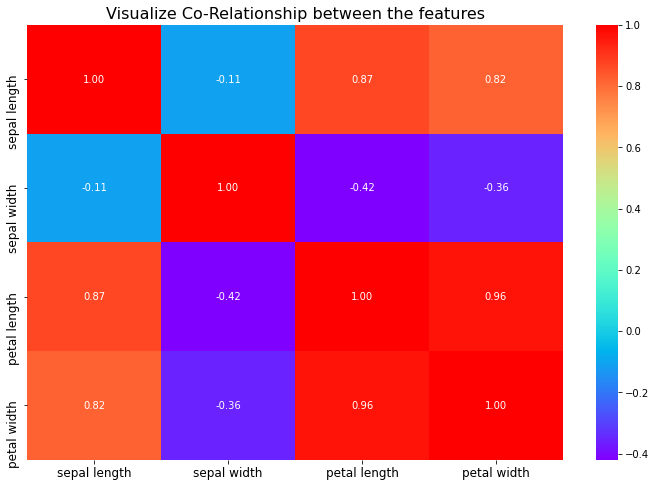

In [5]:
print(df.corr())
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'rainbow')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Visualize Co-Relationship between the features", fontsize = 16)

## Cheack Missing value

In [6]:
df.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

There is Zero Missing value available

## Split dependent and independent data

In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Random Forest Classification model

In [9]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(criterion = 'entropy', random_state = 10)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=10)

### Save model

In [10]:
import pickle

pickle.dump(classifier, open('Random_Forest_model', 'wb'))

### Load model

In [11]:
model = pickle.load(open('Random_Forest_model', 'rb'))
model

RandomForestClassifier(criterion='entropy', random_state=10)

## Predict test set using our Random Forest Classification model¶

In [12]:
y_pred = model.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

## Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_pred)
print(CM)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


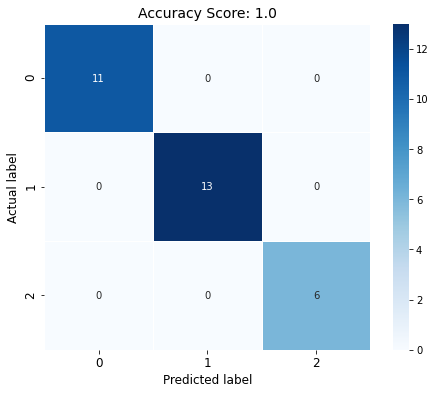

In [14]:
# plot confusion matrix
score = model.score(X, y)

plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 12);
plt.xlabel('Predicted label', fontsize = 12);
plt.title('Accuracy Score: {}'.format(score), size = 14);
plt.tick_params(labelsize= 12)

In [15]:
from sklearn.metrics import accuracy_score

print("Accuracy : ", accuracy_score(y_test, y_pred)*100, "%")

Accuracy :  100.0 %


# Classification_report

In [16]:
from sklearn import metrics

print (metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



**Iris Flower Classification this model can classify 100 % Accuracy**